In [31]:

import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [32]:
# Create a Quantum Circuit acting on a quantum register of four qubits (For half adder)
#The first parameter is Qubits, the second is classical bits.
#For the purposes of this half adder, I will require only 2 classical bits
circ = QuantumCircuit(4,2)

In [33]:
# this makes the first two qubits (1, 1), the normal state of a qubit is (0) 
# and the two lines flip it using the x (not) operation
circ.x(0) 
circ.x(1)

In [34]:
#now I will use the C-NOT or Controlled Not (Classical:XOR) to get the sum of the half adder. 
#the CNOT works by using a control qubit and a target one, it performs the XOR (Technically the NOT) on the target.
circ.cx(0,2)
circ.cx(1,2)
#Our sum is now finished, we need to find the carry.

In [35]:
#Now we will use the Toffoli gate (Classical:AND) to get the carry of the Half-Adder
#The Toffoli gate works by having two control qubits and one target qubit, when both the control qubits are of value 1
#It performs a NOT (x) operation on the target, which means it turns it to a value of 1.
circ.ccx(0,1,3)
#Now qubit3 has the carry value (AND) and qubit2 has the sum value (XOR)

In [36]:
#But for fun, let's visualize our Half Adder circuit.
circ.draw()

┌───┐               
q_0: ┤ X ├──■─────────■──
     ├───┤  │         │  
q_1: ┤ X ├──┼────■────■──
     └───┘┌─┴─┐┌─┴─┐  │  
q_2: ─────┤ X ├┤ X ├──┼──
          └───┘└───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘
c: 2/════════════════════

In [37]:
#Now let's measure the values of our Qubits!
#I will measure for now, qubit2 and qubit3
circ.measure(2,0)
circ.measure(3,1)


In [38]:
#Now for fun again let's see our qubits being measured on drawing!
circ.draw()

┌───┐                     
q_0: ┤ X ├──■─────────■────────
     ├───┤  │         │        
q_1: ┤ X ├──┼────■────■────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
q_2: ─────┤ X ├┤ X ├──┼──┤M├───
          └───┘└───┘┌─┴─┐└╥┘┌─┐
q_3: ───────────────┤ X ├─╫─┤M├
                    └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1

In [39]:
#lets check the value of the qubits using a simulator!
from qiskit import transpile 
from qiskit import IBMQ
#IBMQ.save_account('')
# Use AerSimulator
from qiskit import Aer


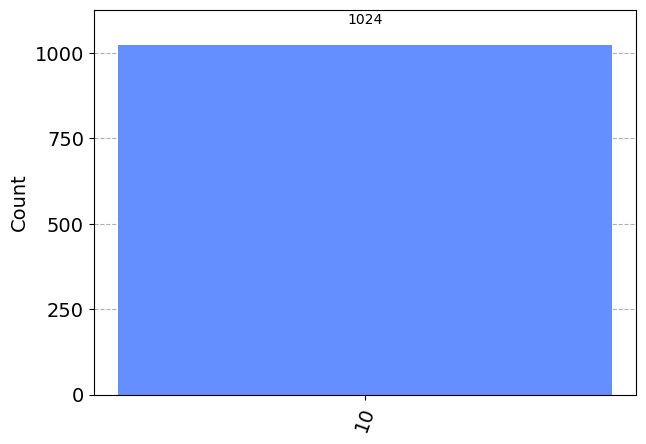

In [40]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circ).result()
counts = result.get_counts()
plot_histogram(counts)